# Example of reading and plotting CloudSat radar reflectivity data

Import standard scientific packages

In [1]:
import cartopy.crs as ccrs
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

In [2]:
from cloudsat_read import get_geodata, read_data
import utils

In [3]:
input_dir = Path('data')

In [4]:
fname = input_dir / '2013085084411_36761_CS_2B-GEOPROF_GRANULE_P_R04_E06.h5'

In [5]:
cloudsat_lons, cloudsat_lats, cloudsat_height, cloudsat_time, elev = get_geodata(fname, return_list=True)
elev = elev * 1e-3

In [6]:
cloudsat_time

array([datetime.datetime(2013, 3, 26, 9, 11, 41),
       datetime.datetime(2013, 3, 26, 9, 11, 41, 160000),
       datetime.datetime(2013, 3, 26, 9, 11, 41, 320000), ...,
       datetime.datetime(2013, 3, 26, 10, 6, 45, 959961),
       datetime.datetime(2013, 3, 26, 10, 6, 46, 120117),
       datetime.datetime(2013, 3, 26, 10, 6, 46, 280029)], dtype=object)

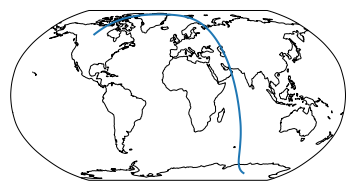

In [7]:
fig = plt.figure()

ax = fig.add_subplot(111, projection=ccrs.Robinson())
ax.coastlines()
ax.set_global()

ax.plot(cloudsat_lons, cloudsat_lats, linewidth=2, transform=ccrs.PlateCarree());

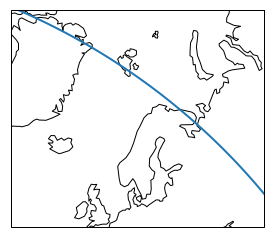

In [8]:
fig = plt.figure()

ax = fig.add_subplot(111, projection=ccrs.Stereographic())
ax.coastlines()
ax.set_extent([-30, 50, 50, 85], crs=ccrs.PlateCarree())

ax.plot(cloudsat_lons, cloudsat_lats, linewidth=2, transform=ccrs.PlateCarree());

In [9]:
bbox = (-2.5, 10, 71, 80)

In [10]:
ii = np.where((cloudsat_lons > bbox[0]) & (cloudsat_lons < bbox[1]) &
              (cloudsat_lats > bbox[2]) & (cloudsat_lats < bbox[3]))[0]
i1, i2 = ii[0], ii[-1]

In [11]:
i1, i2

(16748, 16917)

In [12]:
cloudsat_h1 = 0  # km
cloudsat_h2 = 6  # km
cloudsat_nz = 500  # Number of pixels in the vertical.
# cloudsat_z = np.linspace(cloudsat_h1, cloudsat_h2, cloudsat_nz)

In [13]:
cloudsat_x = np.arange(i1, i2, dtype=np.float32)
cloudsat_z = (cloudsat_height*0.001).astype(np.float32)

In [14]:
cldst_radar = read_data(fname)
cldst_radar = cldst_radar[i1:i2,:]

In [15]:
cldst_radar = utils.cc_interp2d(cldst_radar.filled(np.nan),
                                cloudsat_x,
                                cloudsat_z, i1, i2, i2-i1,
                                cloudsat_h2, cloudsat_h1, cloudsat_nz).T[::-1,:]

In [16]:
radr_cmap  = plt.cm.magma_r
radr_cmap.set_bad('w')
radr_cmap.set_under('w')
radr_norm = mpl.colors.BoundaryNorm(np.linspace(-20, 30, 6), radr_cmap.N)
radr_kw = dict(cmap=radr_cmap, norm=radr_norm, rasterized=True)

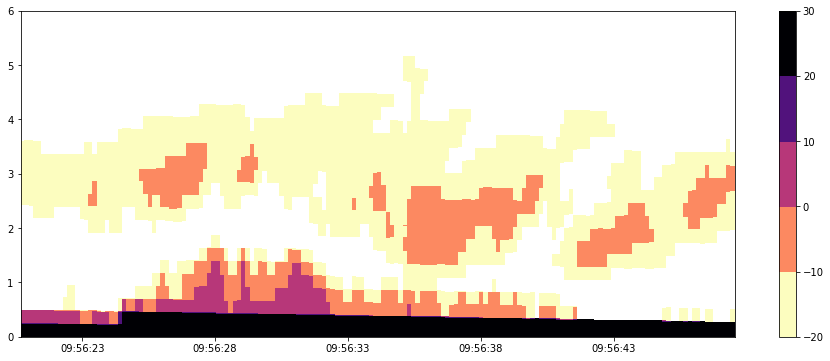

In [17]:
fig, ax = plt.subplots(figsize=(16, 6))
p = ax.pcolormesh(cloudsat_time[i1:i2], np.linspace(cloudsat_h1, cloudsat_h2, cloudsat_nz), cldst_radar, **radr_kw)
fig.colorbar(p);

In [18]:
# class CloudSat:
#     """
#     Handler for reading CloudSat data
#     """
#     def __init__():
#         pass